## Titanic EDA 

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as mno
from mlxtend.preprocessing import minmax_scaling
import matplotlib.ticker as ticker

df = pd.read_csv("Titanic.csv")
print(df.shape)
df.head(10)


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


As shown we can see that there are 891 rows and 12 columns

# Missing Data and Data Cleaning
The missing value count shown below shows that a large number of the "Cabin" column is missing as well as a substantial share of the "Age" column. 
We can see this in the missingness graphic below that age and cabin are missing large shares of data whereas embarked is only missing a few points.

We can therefore drop the "Cabin" column as this is not going to be used in this EDA but will investigate into the missingness of the age data. The ticket number is also largely irrelevant so can be dropped also. 

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
Siblings_Spouse       0
Parents_Children      0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
dtype: int64


<AxesSubplot:>

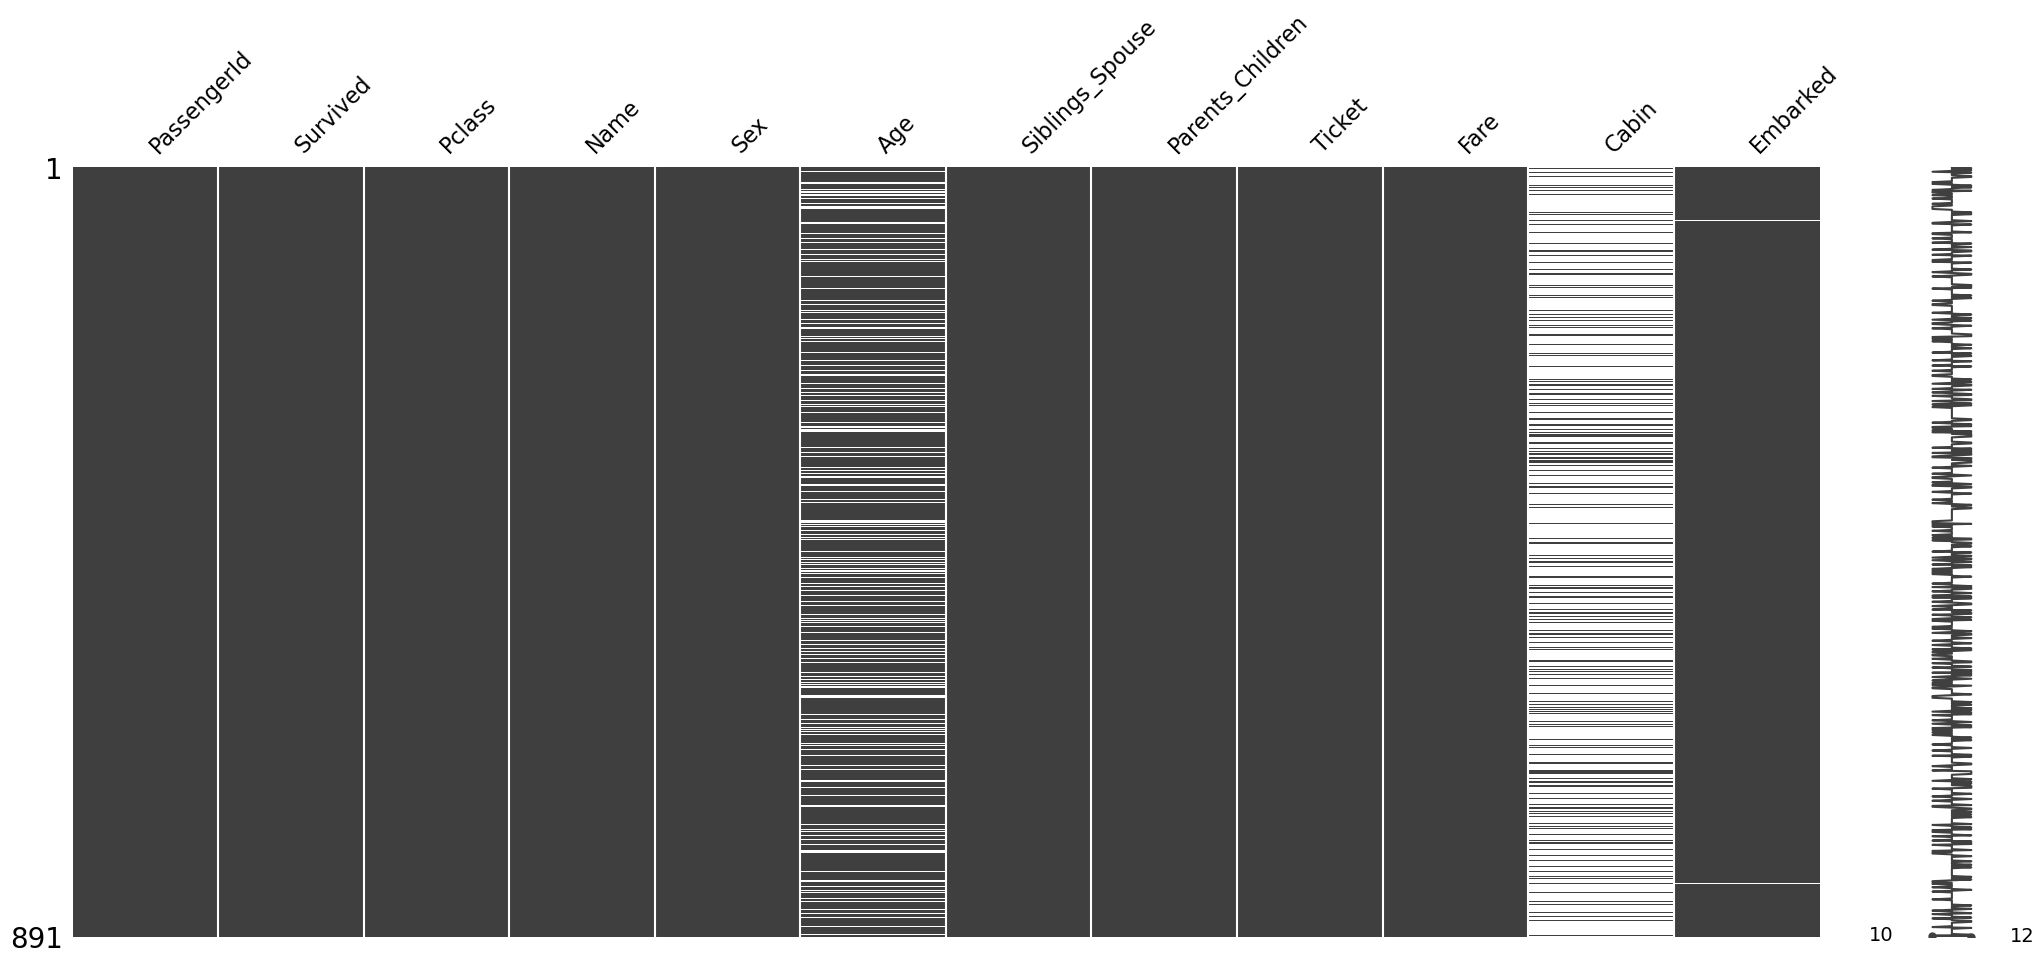

In [58]:
#Rename the "Parch" and "SibSp" columns to make them more understandable as they represent the number of parents and children
#each passenger had onboard and the number of siblings and spouses onboard.
df = df.rename(columns = {"Parch":"Parents_Children","SibSp":"Siblings_Spouse"})
df.head()
original_df = df
missing_values_count = df.isnull().sum()
print(missing_values_count)
mno.matrix(df)


In [59]:
df = df.drop(columns = ["Cabin", "Ticket"])

## Missingness

The tables below show the percentage of age data missing in each category to assess if there is any connection between other variables and missing data and qualify the missingness. 

In the "Sex" category 21.5% of male ages are missing and 16.9% of female age data is missing which suggests there's no real reason to infer any affect of "Sex" on the missing age data.

In the Class category 13.9% of the 1st class age data is missing, 6% of the 2nd class age data and 27.7% of the 3rd class data is missing. We'd probably expect less data to be collected from those in lower classes as the admin is likely to be less organised which would explain why twice as many ages are missing in the 3rd class category as the 1st class category.

In the "Survived" category 22.8% of those that died have missing age data and 15.2% of those that survived have missing age data. This is understandable as further age data may have been collected from the survivors after returning to shore.

This shows that this data is Missing at Random as there are observible reasons for some of the missing data.

In [60]:
df["Missing Ages"] = np.where(df.Age.isnull(), 1,0)
missing_age_sex = df.groupby(["Sex"])["Missing Ages"].mean()
print('\n',missing_age_sex)
missing_age_class = df.groupby(["Pclass"])["Missing Ages"].mean()
print('\n',missing_age_class)
missing_age_survived = df.groupby(["Survived"])["Missing Ages"].mean()
print('\n',missing_age_survived)


 Sex
female    0.168790
male      0.214905
Name: Missing Ages, dtype: float64

 Pclass
1    0.138889
2    0.059783
3    0.276986
Name: Missing Ages, dtype: float64

 Survived
0    0.227687
1    0.152047
Name: Missing Ages, dtype: float64


## Missing Ages
The missing values count below shows that all missing values are accounted for if we replace all missing ages with the average age. Whilst this is not ideal as it will likely affect in depth analysis on the age data it does provide a solution to analyse the rest of the data.

In [61]:
#replacing all missing ages with the average age
mean_age = round(df["Age"].mean(),0)
df.fillna(mean_age, inplace = True)
missing_values_count = df.isnull().sum()
print(missing_values_count)

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
Siblings_Spouse     0
Parents_Children    0
Fare                0
Embarked            0
Missing Ages        0
dtype: int64


# Data Visualisation
## Number of deaths dependent on Age, Sex and Class
The subplots below show the numbers of deaths and survivors across different classes, ages and sexes. The age data was readjusted to remove the mean where it had been used in place of missing data, this is because it misrepresented the data producing a large spike in the 20-30 bin, skewing the data.

<function matplotlib.pyplot.show(close=None, block=None)>

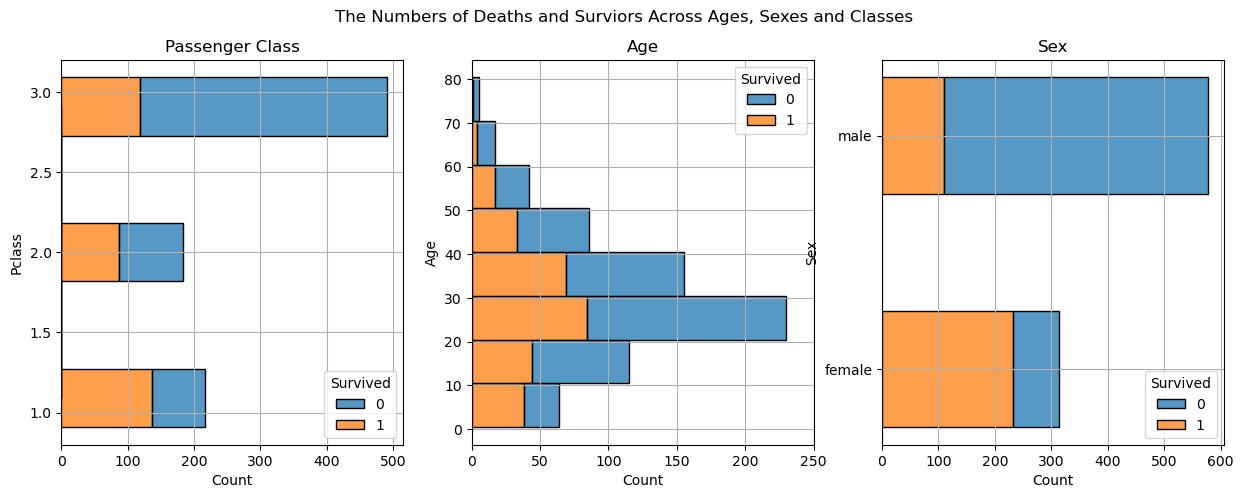

In [72]:
#plot 3 stacked histograms on a subplot
fig, axes = plt.subplots(1,3, sharex=False, figsize=(15,5))
fig.suptitle("The Numbers of Deaths and Surviors Across Ages, Sexes and Classes")
sns.histplot(ax=axes[0], data=df, y="Pclass", hue="Survived", multiple = "stack", shrink = 2).grid()
sns.histplot(ax=axes[1], data=original_df, y="Age", hue="Survived", binwidth = 10, multiple= "stack").grid()
sns.histplot(ax=axes[2], data=df, y="Sex", hue="Survived", multiple = "stack", binwidth = 1, shrink = 0.5).grid()
axes[0].set_title("Passenger Class")
axes[1].set_title("Age")
axes[1].set_xlim(0,250)
axes[2].set_title("Sex")
plt.show

The figures above show that the majority of the passengers on the ship were travelling in 3rd class, were in their 20s on average and were male. Unsurprisingly as these are the most numerous traits these were also the categories that suffered the most deaths.

## Percentage of deaths dependant on Age, Sex and Class
### Class
The pie charts below display the percentage of those who survived dependant on the passenger class the passenger had a ticket in.

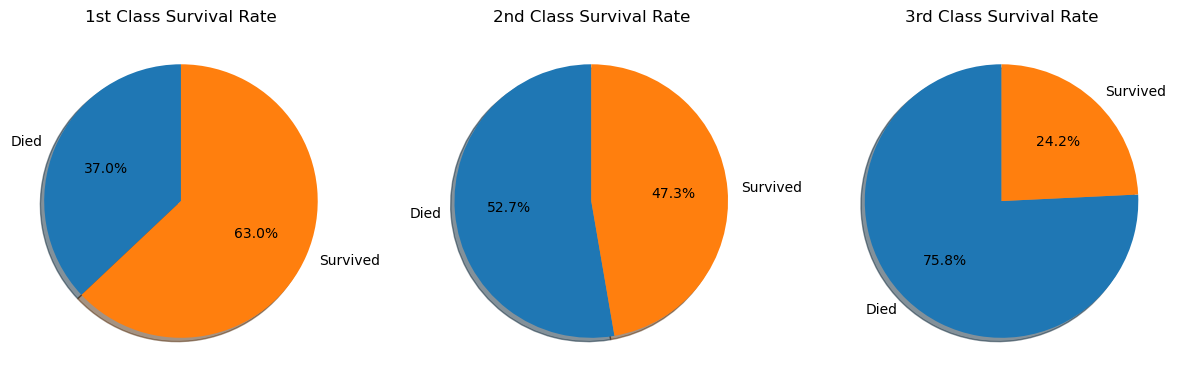

In [118]:
#retrieve the survivor data in each class and count number of survivors and deaths in each class
first_class_sur = df.loc[df["Pclass"]==1, ["Pclass","Survived"]].groupby("Survived").count()
sec_class_sur = df.loc[df["Pclass"]==2, ["Pclass","Survived"]].groupby("Survived").count()
third_class_sur = df.loc[df["Pclass"]==3, ["Pclass","Survived"]].groupby("Survived").count()

#Plot the survivor counts of the 3 classes in pie charts to obtain percentage/chance of survival based on class
labels = "Died", "Survived"
fig1, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].pie(first_class_sur["Pclass"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title("1st Class Survival Rate")
axes[1].pie(sec_class_sur["Pclass"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("2nd Class Survival Rate")
axes[2].pie(third_class_sur["Pclass"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].set_title("3rd Class Survival Rate")
plt.show()

The pie charts above show the percentage of survivors in each class. It is quite clear that 1st class had the highest survival rate of 63% followed by 2nd class with 47.3% survival and that of 3rd class where only 24.2% survived.

### Age
The pie charts below show the survival rate in 10 year intervals across all ages on the boat.

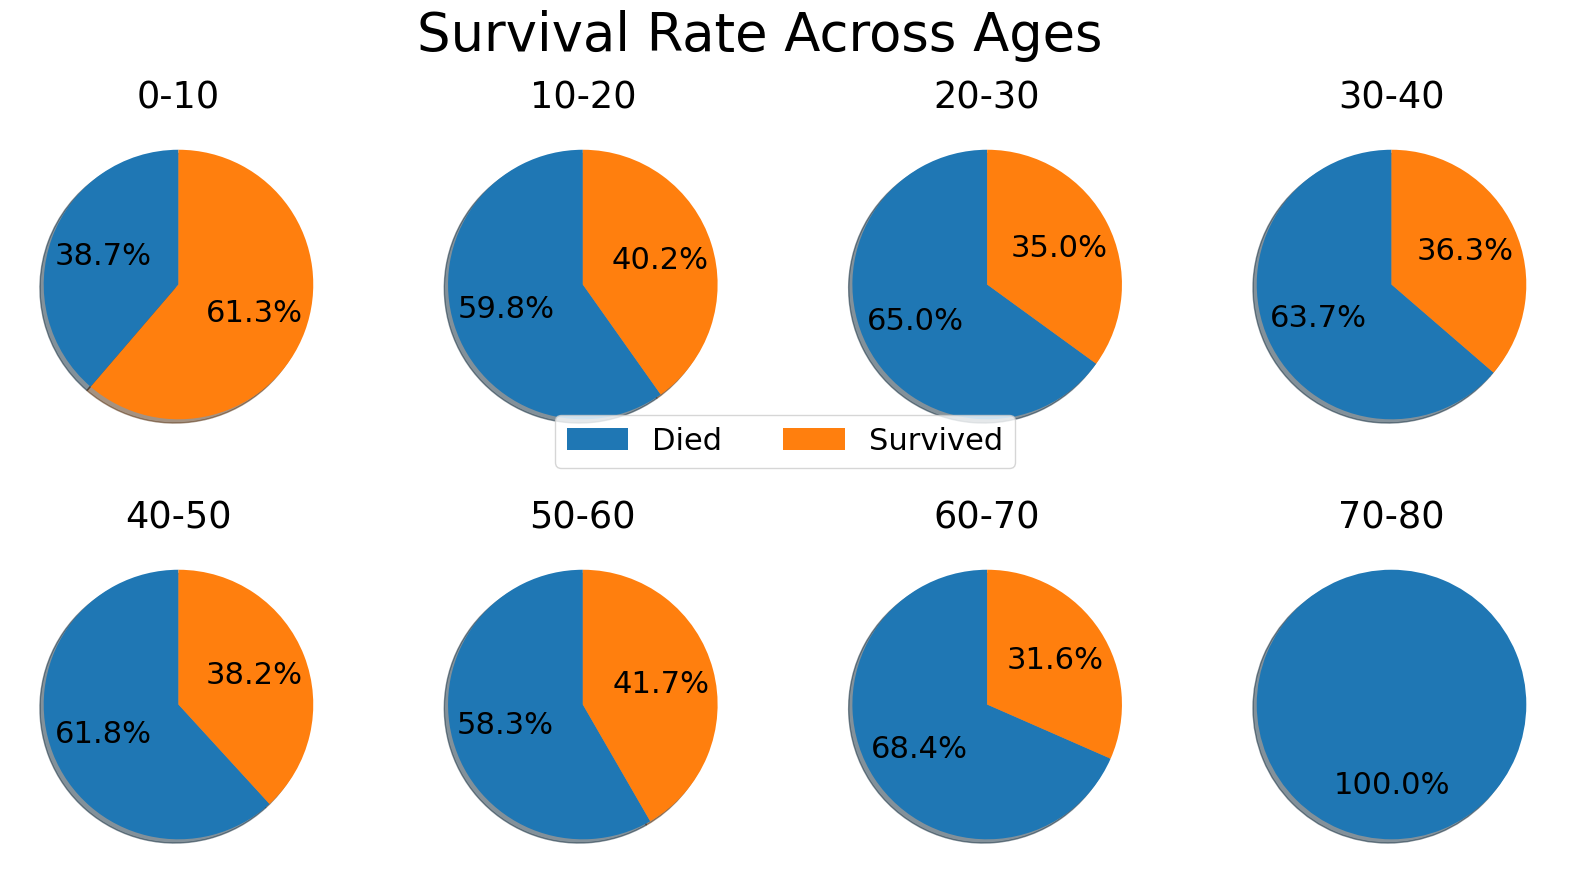

In [79]:
#retrieve the survivor data in age bins of 10 years and count number of survivors and deaths in each bin
bin1_sur = df.loc[(df["Age"]>= 0) & (df["Age"]< 10), ["Age","Survived"]].groupby("Survived").count()
bin2_sur = df.loc[(df["Age"]>= 10) & (df["Age"]< 20), ["Age","Survived"]].groupby("Survived").count()
bin3_sur = df.loc[(df["Age"]>= 20) & (df["Age"]< 30), ["Age","Survived"]].groupby("Survived").count()
bin4_sur = df.loc[(df["Age"]>= 30) & (df["Age"]< 40), ["Age","Survived"]].groupby("Survived").count()
bin5_sur = df.loc[(df["Age"]>= 40) & (df["Age"]< 50), ["Age","Survived"]].groupby("Survived").count()
bin6_sur = df.loc[(df["Age"]>= 50) & (df["Age"]< 60), ["Age","Survived"]].groupby("Survived").count()
bin7_sur = df.loc[(df["Age"]>= 60) & (df["Age"]< 70), ["Age","Survived"]].groupby("Survived").count()
bin8_sur = df.loc[(df["Age"]>= 70) & (df["Age"]< 80), ["Age","Survived"]].groupby("Survived").count()

#Plot the survivor counts of the age bins in pie charts to obtain percentage/chance of survival based on age
labels = "Died", "Survived"
fig1, axes = plt.subplots(2,4, figsize = (20,10))
axes[0,0].pie(bin1_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[0,0].set_title("0-10")
axes[0,1].pie(bin2_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[0,1].set_title("10-20")
axes[0,2].pie(bin3_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[0,2].set_title("20-30")
axes[0,3].pie(bin4_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[0,3].set_title("30-40")
axes[1,0].pie(bin5_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[1,0].set_title("40-50")
axes[1,1].pie(bin6_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[1,1].set_title("50-60")
axes[1,2].pie(bin7_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[1,2].set_title("60-70")
axes[1,3].pie(bin8_sur["Age"], autopct='%1.1f%%', shadow=True, startangle=90)
axes[1,3].set_title("70-80")
plt.figlegend( labels, loc = 'center', ncol=5, labelspacing=0.)
fig1.suptitle("Survival Rate Across Ages", fontsize = "xx-large")
plt.title
plt.rcParams['font.size'] = 22
plt.show()

The above pie charts display The survival rate across age intervals of 10 years from the youngest on the boat to the eldest. It is clear that children under 10 had the greatest survival rate, with 61.3% surviving and that the eldest sufferent the worst casualties with those aged 60-70 with a survival rate of only 31.6% and no survivors aged 70+.

### Sex
The pie charts below display the survival rate of the passengers dependant on their gender.

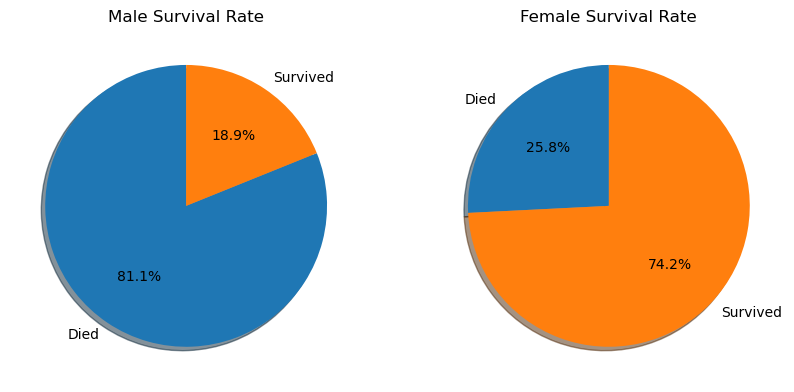

In [80]:
#retrieve the survivor data for each sex and count number of survivors and deaths for each
plt.rcParams['font.size'] = 10
male_sur = df.loc[df["Sex"]=="male", ["Sex","Survived"]].groupby("Survived").count()
female_sur = df.loc[df["Sex"]=="female", ["Sex","Survived"]].groupby("Survived").count()

#Plot the survivor counts of the sexes in pie charts to obtain percentage/chance of survival based on sex
labels = "Died", "Survived"
fig1, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].pie(male_sur["Sex"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title("Male Survival Rate")
axes[1].pie(female_sur["Sex"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title("Female Survival Rate")
plt.show()


The pie charts above display the survival rates based on gender/sex, with the overwhelming survivors being female with a 74.2% chance of survival compared to the male 18.9%.

# Analysis
## Class & Gender

The pie chart below shows how survival depended on both class and gender. With 97% of Females in 1st class surviving compared to only 50% of the females in 3rd class. However this is still higher than 1st class males, of whom only 37% survived compared to 14% of the 3rd class males, who were the most populus demographic onboard the ship.

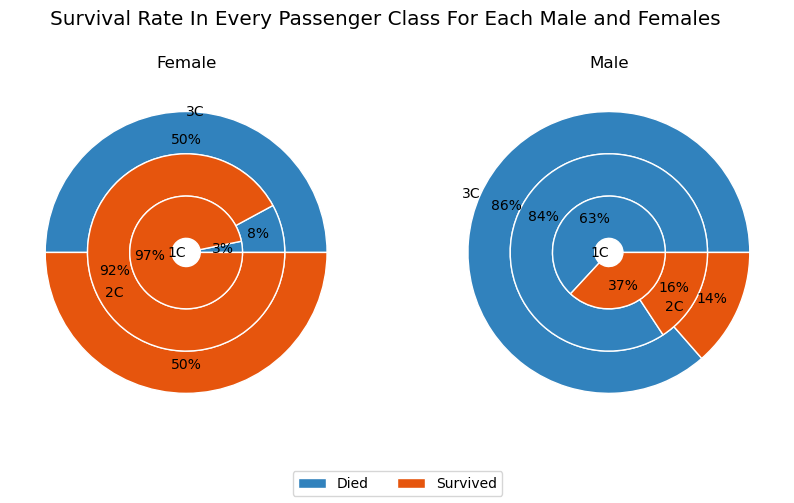

In [182]:
#retrieve data that for females and males in each class and groupby and count survivors
first_fem_sur = df.loc[(df["Pclass"]==1) & (df["Sex"]=="female"), ["Pclass","Sex","Survived"]].groupby("Survived").count()
first_male_sur = df.loc[(df["Pclass"]==1) & (df["Sex"]=="male"), ["Pclass","Sex","Survived"]].groupby("Survived").count()
sec_fem_sur = df.loc[(df["Pclass"]==2) & (df["Sex"]=="female"), ["Pclass","Sex","Survived"]].groupby("Survived").count()
sec_male_sur = df.loc[(df["Pclass"]==2) & (df["Sex"]=="male"), ["Pclass","Sex","Survived"]].groupby("Survived").count()
third_fem_sur = df.loc[(df["Pclass"]==3) & (df["Sex"]=="female"), ["Pclass","Sex","Survived"]].groupby("Survived").count()
third_male_sur = df.loc[(df["Pclass"]==3) & (df["Sex"]=="male"), ["Pclass","Sex","Survived"]].groupby("Survived").count()

#plot a nested pie chart for each gender and show stats for all classes, correctly label, title and legend figure
fig, axes = plt.subplots(1,2, figsize=(10,5))
size, labels, label1, label2, label3 = 0.3, ["Died", "Survived"], ["1C", ""], ["","\n\n\n2C"], ["3C",""]
cmap = plt.colormaps["tab20c"]
inner_colors, outer_colors =cmap([1, 2, 5, 6, 9, 10]), cmap(np.arange(3)*4)
axes[0].pie(third_fem_sur["Sex"], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%',pctdistance=0.8, labeldistance=1, labels = label3)
axes[0].pie(sec_fem_sur["Sex"], radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75, labeldistance=0.65,labels=label2)
axes[0].pie(first_fem_sur["Sex"], radius=1-2*size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.65, labeldistance=0.0, labels=label1, )
axes[0].set(aspect="equal", title='Female')
axes[1].pie(third_male_sur["Sex"], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%',pctdistance=0.8, labeldistance=1, labels = label3)
axes[1].pie(sec_male_sur["Sex"], radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.75, labeldistance=0.65,labels=label2)
axes[1].pie(first_male_sur["Sex"], radius=1-2*size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.65, labeldistance=0.0, labels=label1, )
axes[1].set(aspect="equal", title='Male')
plt.figlegend( labels, loc = 'lower center', ncol=5, labelspacing=0.)
fig.suptitle("Survival Rate In Every Passenger Class For Each Male and Females", fontsize = "x-large")
plt.show()

This shows us that both sex and class were prioritised in the rescue process. However sex was clearly a greater priority than class as all 3 classes of females outperformed 1st class males. This could be due to females only making up approximately 1/3rd of the population onboard.

## Age & Gender

The nested pie charts below show the survival rates across age intervals for both males and females. The oldest passengers of 70+ have been left out of this data as we discovered earlier that nobody over the age of 70 survived.
The data shows that all passengers under 15 years old were priortised over gender with 54% of males under 15 surviving, by far the greatest male survival rate seen so far and only 8% less than the under 15 females. However the females over 15 actually had a greater survival rate than the female children, suggesting that females over 15 were of a greater priority than those under.

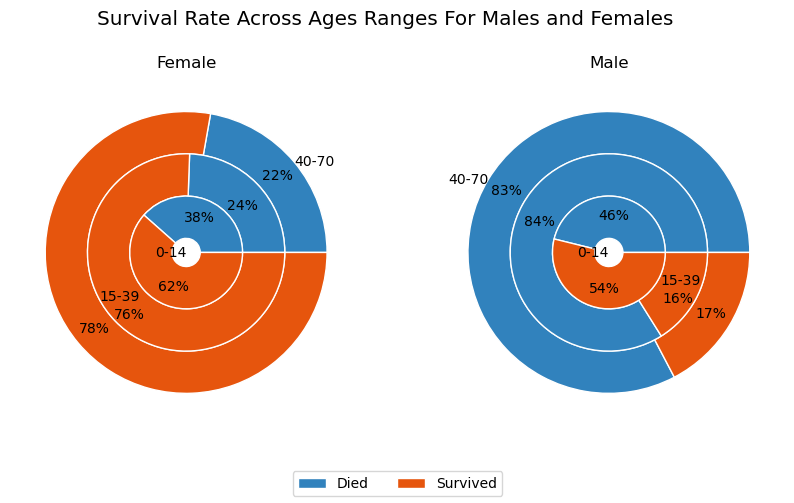

In [190]:
#retrieve data that for females and males in different age bands and groupby and count survivors
young_fem_sur = df.loc[(df["Age"]>= 0) & (df["Age"]< 15) & (df["Sex"]=="female"), ["Age","Sex","Survived"]].groupby("Survived").count()
mid_fem_sur = df.loc[(df["Age"]>= 15) & (df["Age"]< 40) & (df["Sex"]=="female"), ["Age","Sex","Survived"]].groupby("Survived").count()
old_fem_sur = df.loc[(df["Age"]>= 40) & (df["Age"]< 70) & (df["Sex"]=="female"), ["Age","Sex","Survived"]].groupby("Survived").count()
young_male_sur = df.loc[(df["Age"]>= 0) & (df["Age"]< 15) & (df["Sex"]=="male"), ["Age","Sex","Survived"]].groupby("Survived").count()
mid_male_sur = df.loc[(df["Age"]>= 15) & (df["Age"]< 40) & (df["Sex"]=="male"), ["Age","Sex","Survived"]].groupby("Survived").count()
old_male_sur = df.loc[(df["Age"]>= 40) & (df["Age"]<= 70) & (df["Sex"]=="male"), ["Age","Sex","Survived"]].groupby("Survived").count()

#plot a nested pie chart for each gender and show stats for all age bands, correctly label, title and legend figure
fig, axes = plt.subplots(1,2, figsize=(10,5))
size, labels, label1, label2, label3 = 0.3, ["Died", "Survived"], ["0-14", ""], ["","15-39"], ["40-70",""]
cmap = plt.colormaps["tab20c"]
inner_colors, outer_colors =cmap([1, 2, 5, 6, 9, 10]), cmap(np.arange(3)*4)

axes[0].pie(old_fem_sur["Sex"], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%',pctdistance=0.85, labeldistance=1, labels = label3)
axes[0].pie(mid_fem_sur["Sex"], radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='\n%1.0f%%', pctdistance=0.8, labeldistance=0.65,labels=label2)
axes[0].pie(young_fem_sur["Sex"], radius=1-2*size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.65, labeldistance=0.0, labels=label1, )
axes[0].set(aspect="equal", title='Female')

axes[1].pie(old_male_sur["Sex"], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%',pctdistance=0.85, labeldistance=1, labels = label3)
axes[1].pie(mid_male_sur["Sex"], radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='\n%1.0f%%', pctdistance=0.8, labeldistance=0.6,labels=label2)
axes[1].pie(young_male_sur["Sex"], radius=1-2*size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.0f%%', pctdistance=0.65, labeldistance=0.0, labels=label1, )
axes[1].set(aspect="equal", title='Male')

plt.figlegend( labels, loc = 'lower center', ncol=5, labelspacing=0.)
fig.suptitle("Survival Rate Across Ages Ranges For Males and Females", fontsize = "x-large")
plt.show()


It is clear above that for the males passengers the best chance in surviving was for the under 15s, even though this still only lay at 54%, this is far superior than males in any other class or age group. However it appears to be the opposite for young women, who seemingly were left behind in favour of older women. This may reflect society's views of the preference of having male children over female children but also the cultural etiquette in the treatment of older women.

# Conclusion

The most important factor in surviving the Titanic disaster appears to be gender. Women survived at a tremendous rate with over 2/3rds surviving regardless of age or class. Within the females, passenger class was the 2nd most important attribute with almost all the women in 1st class surviving compared to only half in 3rd class. For the females age appears to be a largely irrelevant factor, only disadvantaging girls under 15 but largely unaffecting chances for the rest.

The data on the male side shows that the best chance of surving were for those under 15, especially those under 15 in 1st class. However the majority of the boat were male and in 3rd class who only stood a 14% chance of survival.
So largely it could be said that the quote "Women and children first" does stand with sex playing the most important factor, backed up by age and class, with class not playing as much of an important role for the males.
